In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Explaination of Features in Data Set


1. age (numeric)


2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)


4. education (categorical: 'primary' ,'secondary','teritary,'unknown')


5. default: has credit in default? (categorical: 'no','yes','unknown')


6. housing: has housing loan? (categorical: 'no','yes','unknown')


7. loan: has personal loan? (categorical: 'no','yes','unknown')



### related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')


9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


### other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)


14. previous: number of contacts performed before this campaign and for this client (numeric)


15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonxistent','success')

In [3]:
bank_c= bank.copy()

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


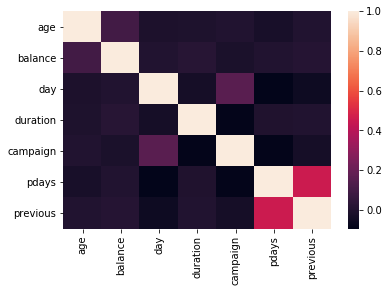

In [5]:
%config InlineBackend.figure_format = 'png'
corr_matrix = bank._get_numeric_data().corr()
sns.heatmap(corr_matrix)

## Simple Visualization of Categorical Data

.

In [6]:
# We have 45 221 rows in the set
len(bank.age)

45211

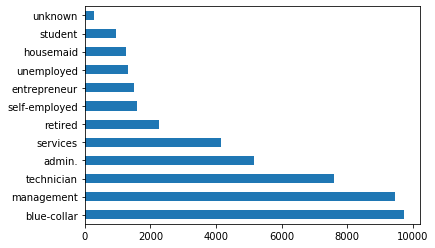

In [7]:
# The three most occuring types of job among the clients are: Blue-collar, Management, Technichians 
bank['job'].value_counts().plot.barh()

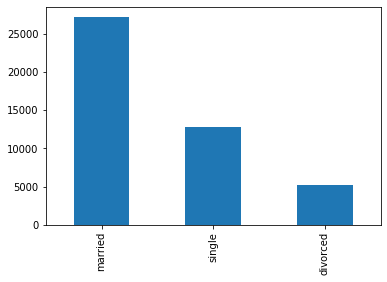

In [8]:
# More than half of the clients are married.
# Around one quarter are single
# Around 5000 are divorced
bank['marital'].value_counts().plot.bar()

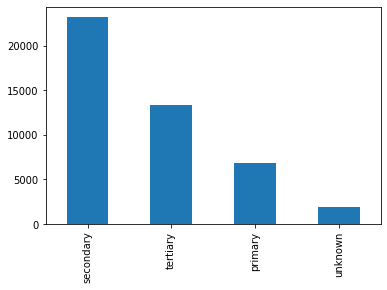

In [9]:
# Around half have a secondary education (finished high school)
# One quarter with some sort of uni.degree

bank['education'].value_counts().plot.bar()

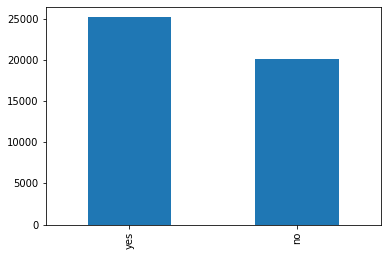

In [10]:
# More than half of clients has bank loan on their house at this bank
bank['housing'].value_counts().plot.bar()

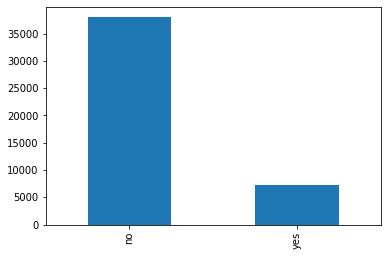

In [11]:
# C:a 6000 have a private loan
bank['loan'].value_counts().plot.bar()

In [12]:
# Creating dummies of our dependent variable
#bank = pd.get_dummies(columns=['y'], data=bank)
#bank.drop(columns=['y_no'], axis=1, inplace=True)

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


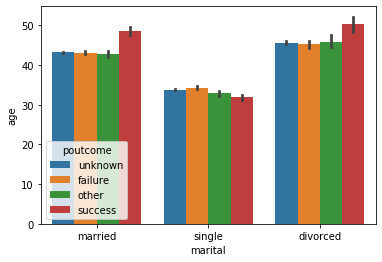

In [15]:
# The mean age is higher among those who agreed to the last marketing campaign, except for the group of singles, 
# where the mean age among those who agreed to the last marketing campaign are the lowest.

sns.barplot(x='marital', y='age', hue= 'poutcome',data = bank)

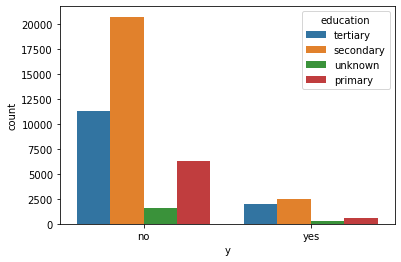

In [16]:

sns.countplot(x='y',hue='education',data=bank)

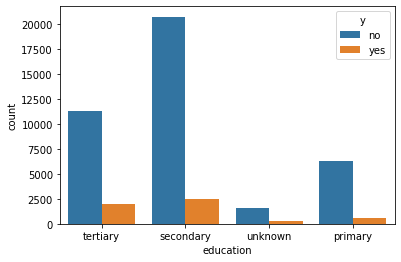

In [17]:
sns.countplot(x='education',hue='y',data=bank)



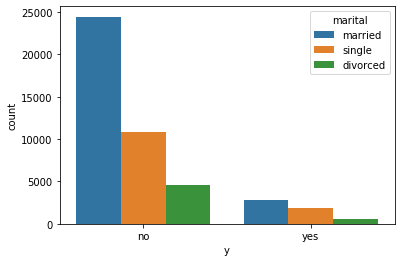

In [18]:
sns.countplot(x='y',hue='marital',data=bank)

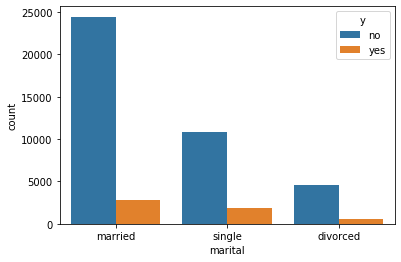

In [19]:
sns.countplot(x='marital',hue='y',data=bank)

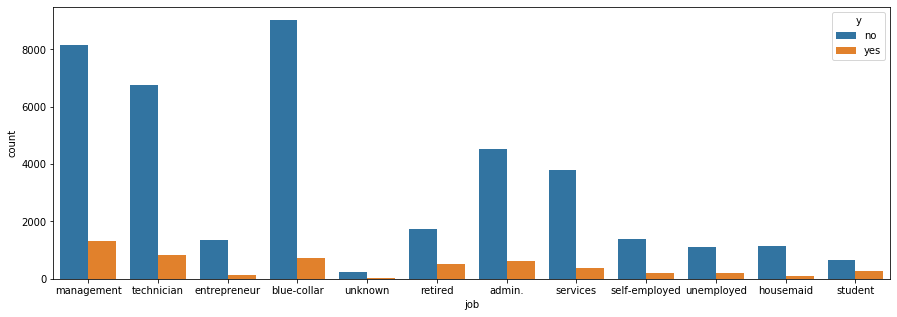

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='y',data=bank)

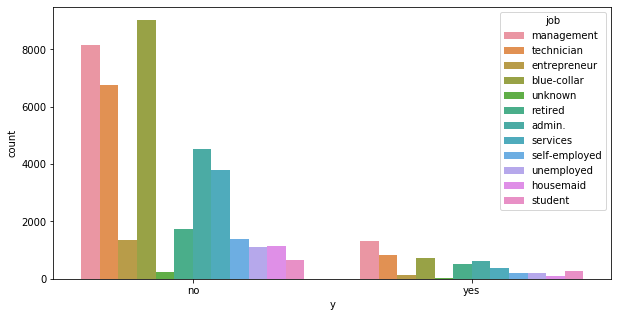

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='y',hue='job',data=bank)

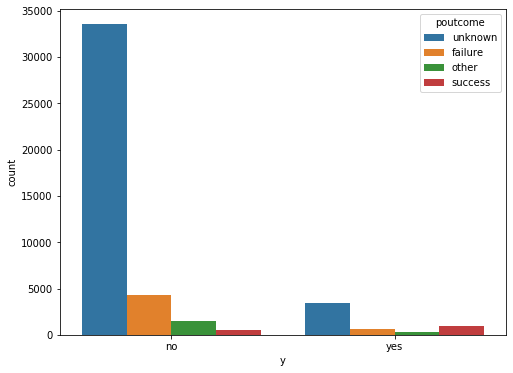

In [22]:
# Customers that
plt.figure(figsize=(8,6))
sns.countplot(x='y',hue='poutcome',data=bank)

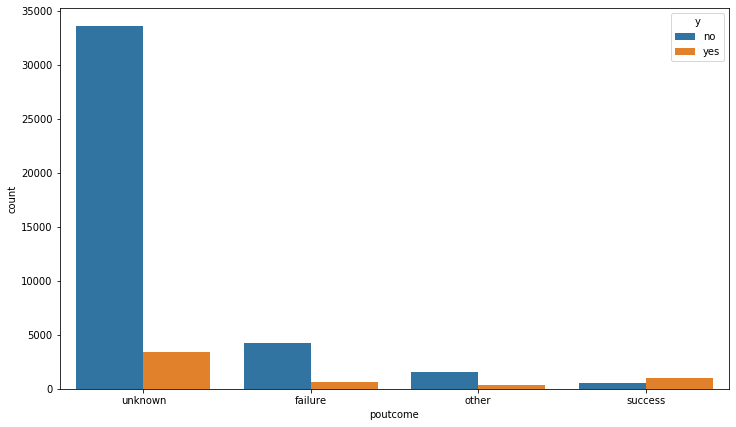

In [23]:
plt.figure(figsize=(12, 7))
sns.countplot(x='poutcome',hue='y',data=bank)

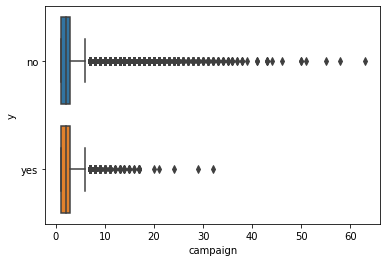

In [24]:
sns.boxplot(x='campaign', y='y', data=bank)

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
# FRÅGA: eftersom det är så få som svarat YES i y(var som jag förutspår),
# Ska jag dela data setet så att det är c:a hälften ja/nej



In [27]:
# DO THIS CHART
# https://python-graph-gallery.com/13-percent-stacked-barplot/


#Try this to:
# https://python-graph-gallery.com/13-percent-stacked-barplot/